In [3]:
import matplotlib.pyplot as plt
import os

In [4]:
# Đường dẫn dữ liệu
dataset_dir = r"C:\Users\GIGABYTE\PycharmProjects\FER\DATASET\AffectNet"
train_dir = r"C:\Users\GIGABYTE\PycharmProjects\FER\DATASET\AffectNet\train"
val_dir = r"C:\Users\GIGABYTE\PycharmProjects\FER\DATASET\AffectNet\val"
test_dir = r"C:\Users\GIGABYTE\PycharmProjects\FER\DATASET\AffectNet\test"

In [7]:
# Hàm đếm tổng số lượng ảnh trong mỗi tệp
def count_images_in_sub_datasets(dataset_dir):
    sub_datasets = ['train', 'val', 'test']
    counts = {}

    for sub in sub_datasets:
        sub_dir = os.path.join(dataset_dir, sub)
        if os.path.exists(sub_dir):
            # Đếm tổng số ảnh trong tất cả các thư mục con
            total_images = sum([
                len(files) for _, _, files in os.walk(sub_dir)
            ])
            counts[sub] = total_images
        else:
            counts[sub] = 0

    return counts

# Đếm số lượng ảnh
image_counts = count_images_in_sub_datasets(dataset_dir)
# Tính tổng số lượng ảnh
total_images = sum(image_counts.values())


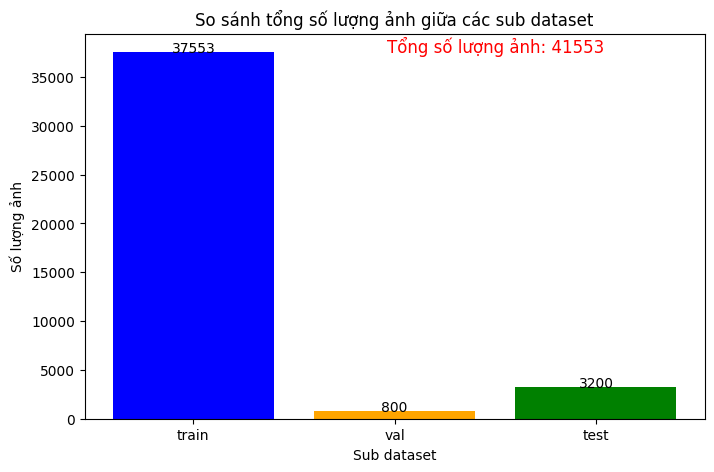

In [8]:
# Vẽ biểu đồ
sub_datasets = list(image_counts.keys())
num_images = list(image_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(sub_datasets, num_images, color=['blue', 'orange', 'green'])
plt.title('So sánh tổng số lượng ảnh giữa các sub dataset')
plt.xlabel('Sub dataset')
plt.ylabel('Số lượng ảnh')

# Hiển thị giá trị trên từng cột
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Hiển thị tổng số lượng ảnh
plt.text(1.5, max(num_images) + 20, f"Tổng số lượng ảnh: {total_images}",
         ha='center', fontsize=12, color='red')

plt.show()

In [18]:
# Đếm số lượng tệp hình ảnh trong thư mục con theo nhãn
def count_images(directory):
    image_extensions = {'.jpg', '.jpeg', '.png'}
    label_counts = {}

    for folder in os.listdir(directory):
        path = os.path.join(directory, folder)
        if os.path.isdir(path):
            label_counts[folder] = len([
                file for file in os.listdir(path)
                if os.path.splitext(file)[-1].lower() in image_extensions
            ])
    return label_counts

# Số lượng ảnh trong train và val
train_counts = count_images(train_dir)
val_counts = count_images(val_dir)

In [19]:
print("Số lượng ảnh trong train:", train_counts)
print("Số lượng ảnh trong val:", val_counts)

Số lượng ảnh trong train: {'0': 5000, '1': 5000, '2': 5000, '3': 5000, '4': 5000, '5': 5000, '6': 5000, '7': 5000}
Số lượng ảnh trong val: {'0': 100, '1': 100, '2': 100, '3': 100, '4': 100, '5': 100, '6': 100, '7': 100}


In [14]:
import shutil
import random
dir_1 = r"C:\Users\GIGABYTE\PycharmProjects\FER\DATASET\AffectNet\train\1"
dir_2 = r"C:\Users\GIGABYTE\PycharmProjects\FER\DATASET\AffectNet\train\7"
dir_3 = r"C:\Users\GIGABYTE\PycharmProjects\FER\DATASET\AffectNet\train\0"
num1 = len(os.listdir(dir_1))
num2 = len(os.listdir(dir_2))
num3 = len(os.listdir(dir_3))

In [15]:
def oversample_images(source_dir, target_dir, additional_count):
    images = os.listdir(source_dir)
    for _ in range(additional_count):
        image_to_duplicate = random.choice(images)
        new_image_name = f"copy_{random.randint(1000, 9999)}_{image_to_duplicate}"
        shutil.copy(os.path.join(source_dir, image_to_duplicate), os.path.join(target_dir, new_image_name))

In [17]:
# Số lượng ảnh cần thêm qua oversampling
additional_count = num3 - num2
if additional_count > 0:
    oversample_images(dir_2, dir_2, additional_count)
    print(f"Đã sao chép thêm {additional_count} ảnh.")
else:
    print("Không cần oversampling, số lượng ảnh đã cân bằng.")

Đã sao chép thêm 1250 ảnh.


In [20]:
from PIL import Image
import numpy as np
def calculate_image_dimensions(dataset_dir):
    heights = []
    widths = []

    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Chỉ tính ảnh
                img_path = os.path.join(root, file)
                with Image.open(img_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)

    return {
        "mean_height": np.mean(heights),
        "std_height": np.std(heights),
        "mean_width": np.mean(widths),
        "std_width": np.std(widths),
        "total_images": len(heights),
    }

In [21]:
# Tính toán cho từng tập
train_stats = calculate_image_dimensions(train_dir)
val_stats = calculate_image_dimensions(val_dir)
test_stats = calculate_image_dimensions(test_dir)

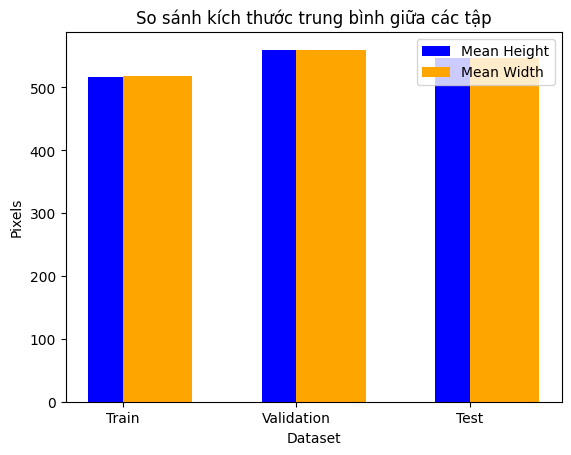

In [22]:
# Chuẩn bị dữ liệu
datasets = ['Train', 'Validation', 'Test']
mean_heights = [train_stats['mean_height'], val_stats['mean_height'], test_stats['mean_height']]
mean_widths = [train_stats['mean_width'], val_stats['mean_width'], test_stats['mean_width']]

# Vẽ biểu đồ
x = range(len(datasets))
plt.bar(x, mean_heights, width=0.4, label='Mean Height', color='blue', align='center')
plt.bar(x, mean_widths, width=0.4, label='Mean Width', color='orange', align='edge')

plt.xticks(x, datasets)
plt.title('So sánh kích thước trung bình giữa các tập')
plt.xlabel('Dataset')
plt.ylabel('Pixels')
plt.legend()
plt.show()

In [23]:
def resize_images_in_folder(dataset_dir, target_size=(224, 224)):
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Chỉ tính ảnh
                img_path = os.path.join(root, file)
                with Image.open(img_path) as img:
                    img_resized = img.resize(target_size)  # Resize ảnh
                    img_resized.save(img_path)  # Lưu lại ảnh đã resize

In [24]:
# Resize tất cả ảnh trong các thư mục
resize_images_in_folder(train_dir)
resize_images_in_folder(val_dir)
resize_images_in_folder(test_dir)

In [25]:
def print_resized_image_sizes(dataset_dirs, target_size=(224, 224)):
    # Duyệt qua từng thư mục dataset (train, validation, test)
    for dataset_dir in dataset_dirs:
        print(f"Dataset: {dataset_dir}")
        for root, _, files in os.walk(dataset_dir):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Chỉ tính ảnh
                    img_path = os.path.join(root, file)
                    with Image.open(img_path) as img:
                        # In kích thước ảnh sau khi resize
                        resized_size = img.size
                        print(f"Image: {file} - Resized Size: {resized_size}")
                        if resized_size == target_size:
                            print(f"-> Image is correctly resized to {target_size}")
                        else:
                            print(f"-> Image size is incorrect, expected {target_size} but got {resized_size}")
                        print("-" * 50)

In [26]:
print_resized_image_sizes([train_dir, val_dir, test_dir])

Dataset: C:\Users\GIGABYTE\PycharmProjects\FER\DATASET\AffectNet\train
Image: image0000006.jpg - Resized Size: (224, 224)
-> Image is correctly resized to (224, 224)
--------------------------------------------------
Image: image0000007.jpg - Resized Size: (224, 224)
-> Image is correctly resized to (224, 224)
--------------------------------------------------
Image: image0000012.jpg - Resized Size: (224, 224)
-> Image is correctly resized to (224, 224)
--------------------------------------------------
Image: image0000035.jpg - Resized Size: (224, 224)
-> Image is correctly resized to (224, 224)
--------------------------------------------------
Image: image0000060.jpg - Resized Size: (224, 224)
-> Image is correctly resized to (224, 224)
--------------------------------------------------
Image: image0000061.jpg - Resized Size: (224, 224)
-> Image is correctly resized to (224, 224)
--------------------------------------------------
Image: image0000066.jpg - Resized Size: (224, 224)
->

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

